---

# Vadi-Samvadi Based Classification

---

### Pitch Histogram
- Serves as an indicator of **vadi**, **samvadi**, and **vivadi** swaras.
- Also indicates whether a particular **svara** is **tivra**, **shuddha**, or **komal**.


In [2]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [10]:
X = np.load('../dataset/counts.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [11]:
X = np.expand_dims(X, axis=-1)

In [12]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73, 1)
y shape: (36262, 40)


## Train-test split

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [14]:
x_input = keras.layers.Input(shape=(X.shape[1], X.shape[2]))

In [15]:
x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(32, 5, activation='relu', padding='same')(x_input)
x = keras.layers.Conv1D(64, 5, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling1D(pool_size=2)(x)
x = keras.layers.Dropout(0.25)(x)

I0000 00:00:1744455961.868486   16663 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744455962.013504   16663 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744455962.013587   16663 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744455962.054279   16663 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744455962.054633   16663 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [16]:
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [17]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=x_input, outputs=output)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 73, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 73, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 36, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 36, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,312 (2.74 MB)

 Trainable params: 718,312 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [19]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744455970.699084   16848 service.cc:146] XLA service 0x7fb7580020c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744455970.699143   16848 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5


 73/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0378 - loss: 3.6564

I0000 00:00:1744455974.933382   16848 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


794/794 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1781 - loss: 3.0092 - val_accuracy: 0.5196 - val_loss: 1.5687
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4701 - loss: 1.7314 - val_accuracy: 0.5996 - val_loss: 1.3131
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5404 - loss: 1.4706 - val_accuracy: 0.6190 - val_loss: 1.2184
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5809 - loss: 1.3388 - val_accuracy: 0.6312 - val_loss: 1.1584
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6077 - loss: 1.2482 - val_accuracy: 0.6543 - val_loss: 1.0937
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6196 - loss: 1.2105 - val_accuracy: 0.6805 - val_loss: 1.0172
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6397 - loss: 1.1247 - val_accuracy: 0.6698 - val_loss: 1.0294
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6479 - loss: 1.1067 - val_accuracy: 0.6930 - val

In [20]:
# Save the model
model.save('../models/vadi_samvadi_model.keras')

## Test

In [21]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/vadi_samvadi_model.keras')

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7741 - loss: 0.7837


In [23]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 77.11


In [24]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.7596675923642878


In [26]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

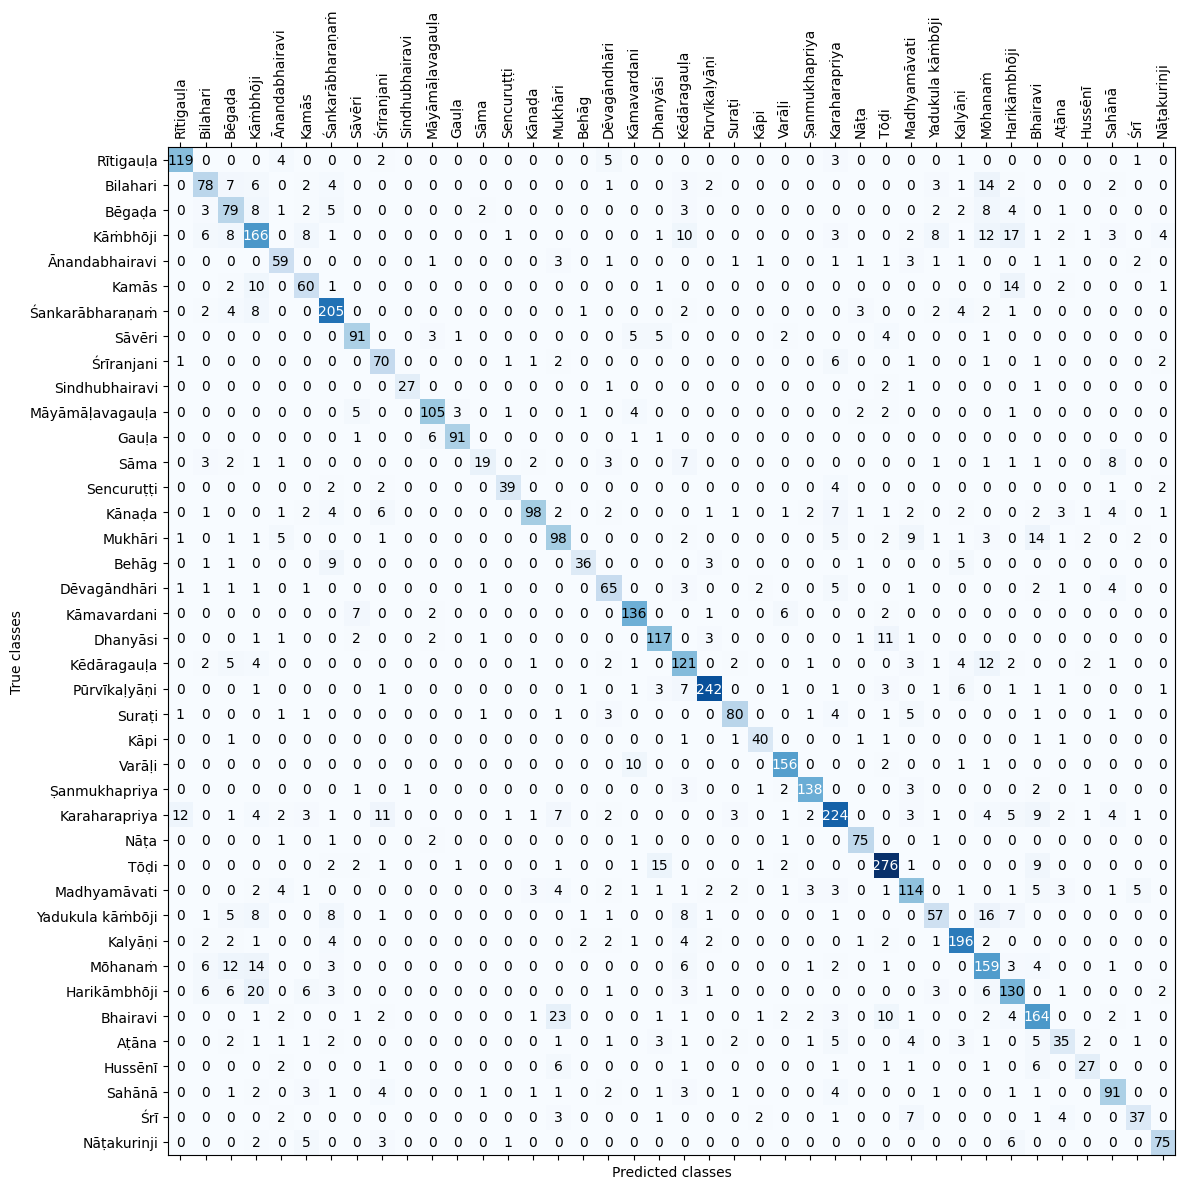

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_histogram.png', dpi=300)
plt.tight_layout()
plt.show()

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                  precision    recall  f1-score   support

       Rītigauḷa       0.88      0.88      0.88       135
        Bilahari       0.70      0.62      0.66       125
          Bēgaḍa       0.56      0.66      0.61       120
        Kāṁbhōji       0.63      0.65      0.64       255
  Ānandabhairavi       0.68      0.76      0.72        78
           Kamās       0.63      0.66      0.65        91
 Śankarābharaṇaṁ       0.80      0.88      0.84       234
          Sāvēri       0.83      0.81      0.82       112
      Śrīranjani       0.67      0.81      0.73        86
  Sindhubhairavi       0.96      0.84      0.90        32
 Māyāmāḷavagauḷa       0.87      0.85      0.86       124
           Gauḷa       0.95      0.91      0.93       100
            Sāma       0.76      0.38      0.51        50
      Sencuruṭṭi       0.89      0.78      0.83        50
          Kānaḍa       0.91      0.68      0.77       145
         Mukhāri       0.64   

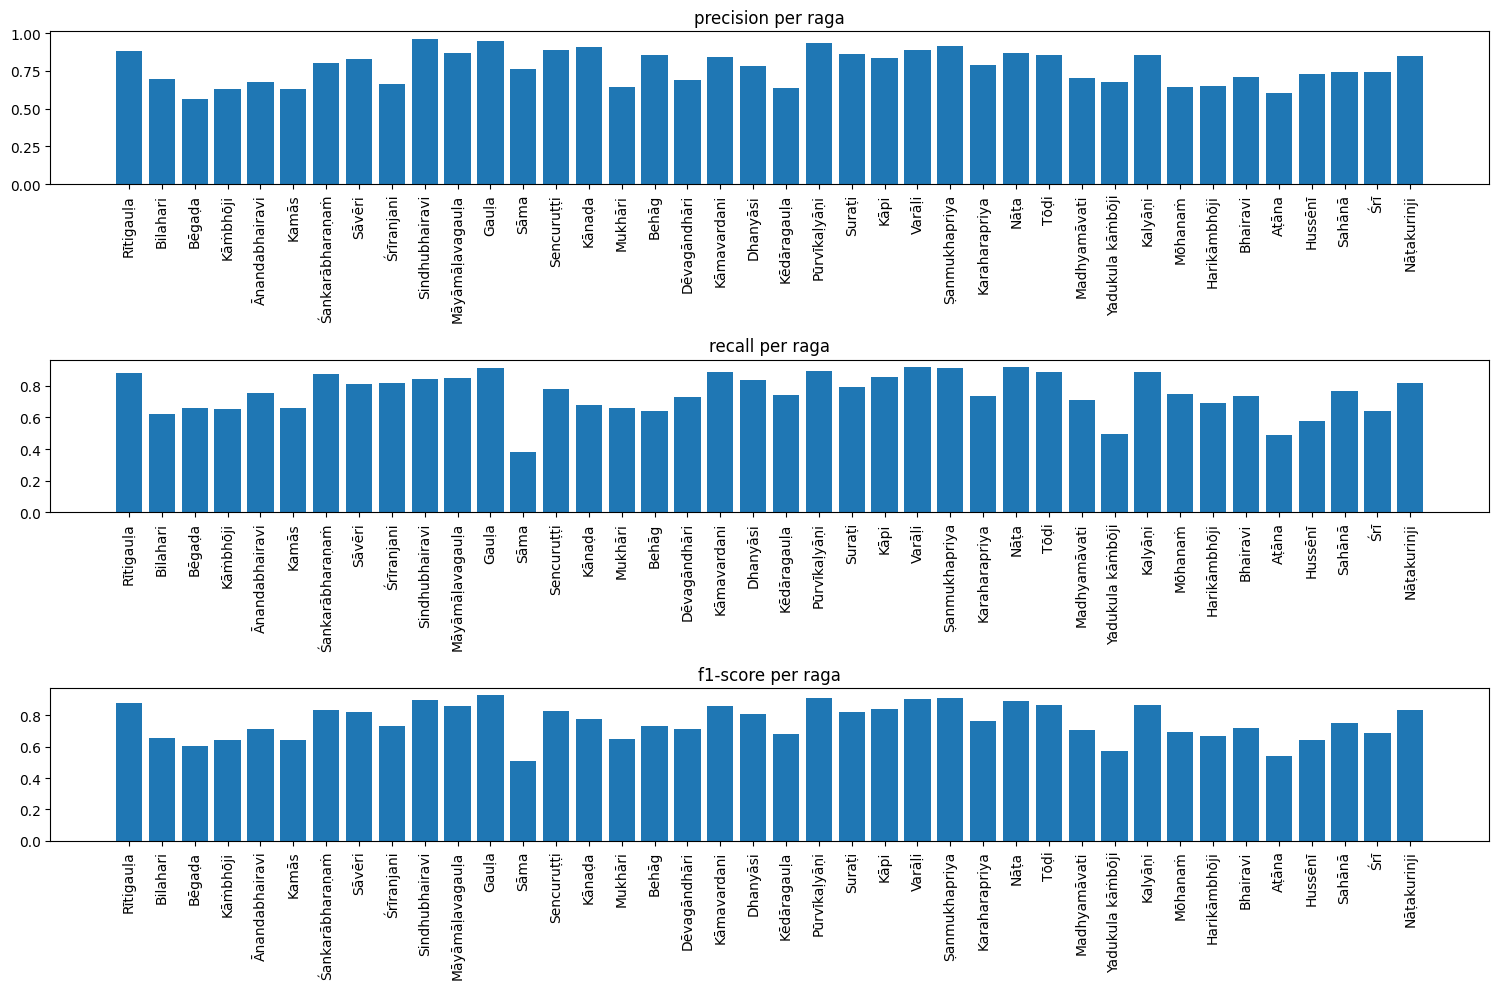

In [28]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)  # Fixed: model only takes one input
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

# Plot precision, recall and f1-score for each class
metrics = ['precision', 'recall', 'f1-score']
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i+1)
    values = [report[raga][metric] for raga in classes]
    plt.bar(classes, values)
    plt.title(f'{metric} per raga')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../plots/metrics_per_class_vadi_samvadi.png', dpi=300)  # Changed filename to avoid overwriting
plt.show()